In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [2]:
# EVERYTHING IS 1 units

#constants
e        = 1.     #electron charge
m        = 1.     #electron mass
c        = 1.     #speed of light
epsilon0 = 1.     #permittivity of free space
epsilon  = -1.    #sign of electron charge

#parameters
B     = 1.         #background B strength
n_e   = 1.         #electron number density cm^-3
w_T   = 1.        #dimensionless electron temp. k_B T / m c^2
theta = np.pi / 3. #observer angle

#derived quantities
omega_p = np.sqrt(n_e * e**2. / (m * epsilon0))     # plasma frequency    (=1 in these units)
omega_c = e * B / (m * c)                           # cyclotron frequency (=1 in these units)

In [3]:
def K_12_integral(tau, omega):
    k_perp = omega / c * np.sin(theta)                  # wavevector perp component n = 1 approximation
    k_z    = omega / c * np.cos(theta)                  # wavevector parallel comp. n = 1 approximation
    lambd   = k_perp**2. * w_T**2. / (2. * omega_c**2.) # just a defined parameter
    term1 = 2. * 1j * omega_p**2. / omega
    term2 = np.sin(epsilon * omega_c * tau) * np.exp(1j * omega * tau)
    term3 = (lambd * np.sin(epsilon * omega_c * tau / 2.)**2. - 1./2.)
    term4 = np.exp(-2. * lambd * np.sin(epsilon * omega_c * tau / 2.)**2.)
    term5 = np.exp(-w_T**2. * k_z**2. * tau**2. / 4.)
    ans = term1 * term2 * term3 * term4 * term5
    return ans

In [7]:
def K_12(omega):
    real_part = quad(lambda tau: K_12_integral(tau, omega).real, 0., np.inf)
    imag_part = quad(lambda tau: K_12_integral(tau, omega).imag, 0., np.inf)
    ans = real_part[0] + imag_part[0] * 1j
    return ans

omega = np.linspace(0.51, 4.51, 100)

def CPL(omega): #COLD PLASMA LIMIT
    ans = 1j * omega_c * omega_p**2. / (omega * (omega_c**2. - omega**2.))
    return ans

print K_12(1.)

(-0.825137931158+0.298453487796j)


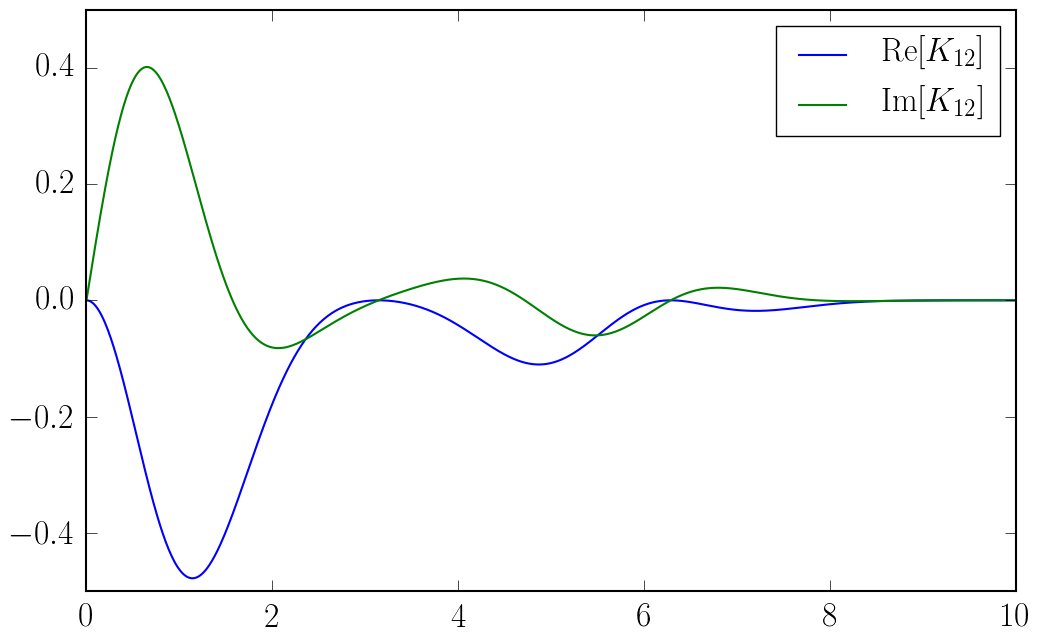

In [25]:
#PLOT OF INTEGRAND
tau = np.linspace(0, 10, 1000)
omega = 1.


pl.plot(tau, K_12_integral(tau, omega).real, label='$\\mathrm{Re}[K_{12}]$')
pl.plot(tau, K_12_integral(tau, omega).imag, label='$\\mathrm{Im}[K_{12}]$')
pl.legend(loc='upper right')

In [ ]:
#ACTUAL REASONABLE VALUES FOR CONSTANTS

#constants
e        = 4.80320680e-10    #electron charge
m        = 9.1093826e-28     #electron mass
c        = 2.99792458e10     #speed of light
epsilon0 = 1./(4. * np.pi)   #permittivity of free space
epsilon  = -1.               #sign of electron charge

#parameters
omega = 1.5 * 527646296.344         #wave frequency
B     = 30.                         #background B strength
n_e   = 1.                          #electron number density cm^-3
w_T   = 10.                         #dimensionless electron temp. k_B T / m c^2
theta = np.pi / 3.                  #observer angle

#derived quantities

k_perp = omega / c * np.sin(theta)                  # wavevector perp component n = 1 approximation
k_z    = omega / c * np.cos(theta)                  # wavevector parallel comp. n = 1 approximation
omega_p = np.sqrt(n_e * e**2. / (m * epsilon0))     # plasma frequency
omega_c = e * B / (m * c)                           # cyclotron frequency
lambd   = k_perp**2. * w_T**2. / (2. * omega_c**2.) # just a defined parameter